# <center>Principal Component Analysis - Vehicle Silhouette</center>
### Description: 
This is a vehicle description dataset where the features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness. 

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

### Objective: 
To classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the 
silhouette.The vehicle may be viewed from one of many different angles.

**Attribute Information**:
- $COMPACTNESS: \frac{(average\;perim)^2}{area}$
- $CIRCULARITY: \frac{(average\;radius)^2}{area}$
- $DISTANCE\;CIRCULARITY: \frac{area}{(avg.\;distance\;from\;border)^2}$
- $RADIUS\;RATIO: \frac{max\;rad\;-\;min\;rad}{avg.\;radius}$
- $PR.AXIS\;ASPECT\;RATIO: \frac{minor\;axis}{major\;axis}$
- $MAX.LENGTH\;ASPECT\;RATIO: \frac{length\;perp.\;max\;length}{max\;length}$
- $SCATTER\;RATIO: \frac{inertia\;about\;minor\;axis}{inertia\;about\;major\;axis}$
- $ELONGATEDNESS: \frac{area}{shrink\;width^2}$
- $PR.AXIS\;RECTANGULARITY: \frac{area}{pr.axis\;length\;*\;pr.axis\;width}$
- $MAX.LENGTH\;RECTANGULARITY: \frac{area}{max.length\;*\;length\;perp.\;to\;this}$
- $SCALED\;VARIANCE: \frac{2nd\;order\;moment\;about\;minor\;axis}{area}$
- $SCALED\;VARIANCE.1: \frac{2nd\;order\;moment\;about\;major\;axis}{area}$
- $SCALED\;RADIUS\;OF\;GYRATION: \frac{mavar\;+\;mivar}{area}$
- $SKEWNESS\;ABOUT: \frac{3rd\;order\;moment\;about\;major\;axis}{sigma\_min^3}$
- $SKEWNESS\;ABOUT: \frac{3rd\;order\;moment\;about\;minor\;axis}{sigma\_maj^3}$
- $KURTOSIS\;ABOUT: \frac{4th\;order\;moment\;about\;major\;axis}{sigma\_min^4}$
- $KURTOSIS\;ABOUT: \frac{4th\;order\;moment\;about\;minor\;axis}{sigma\_maj^4}$
- $HOLLOWS\;RATIO: \frac{area\;of\;hollows}{area\;of\;bounding\;polygon}$

Where $sigma\_maj^2$ is the variance along the major axis and $sigma\_min^2$ is the variance along the minor axis, and area of hollows = area of bounding poly-area of object 

- CLASSES: CAR, BUS, VAN 

Let's analyze the dataset and obtain multicolinearity if any. Apply Principal Component Analysis (PCA) to reduce the dimenstion with covering more than 95% variance

---
## Imports and Configurations

In [0]:
# Utilities
from time import time

# Numerical calculation
import numpy as np

# Data handling
import pandas as pd

# Pandas Profiling
import pandas_profiling as pp

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sample and parameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Predictive Modeling
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [0]:
# Configure for any default setting of any library
%matplotlib inline
# sns.set(style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True)

**Comments**
- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
- Set few of the Seaborn's asthetic parameters
---
## Load the Dataset

In [0]:
# Load the dataset into a Pandas dataframe called vehicle
vehicle = pd.read_csv('vehicle.csv')


In [49]:
#Checking ProfileReport
pp.ProfileReport(vehicle)

In [50]:
# Check the head of the dataset
vehicle.head()

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

In [51]:
# Check the tail of the dataset
vehicle.tail()

compactness  circularity  ...  hollows_ratio  class
841           93         39.0  ...            195    car
842           89         46.0  ...            197    van
843          106         54.0  ...            201    car
844           86         36.0  ...            195    car
845           85         36.0  ...            190    van

[5 rows x 19 columns]

**Comments**
* To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.
---
## Deliverable - 1
Data pre-processing - Understand the data and treat missing values, outliers 
### Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *compactness*, *circularity*, *distance_circularity*, *radius_ratio*,*pr.axis_aspect_ratio*, *max.length_aspect_ratio*, *scatter_ratio*, *elongatedness*, *pr.axis_rectangularity*, *max.length_rectangularity*, *scaled_variance*, *scaled_variance.1*, *scaled_radius_of_gyration*, *scaled_radius_of_gyration.1*, *skewness_about*, *skewness_about.1*, *skewness_about.2*, *hollows_ratio*.
- Response vector contains the value of **Target variable**(prediction or output) for each row of feature matrix. In above dataset, the class variable name is *class*.

In [52]:
# Get the shape and size of the dataset
vehicle.shape

(846, 19)

In [53]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**Observations**
- The dataset comprises of **846 rows** and **19 columns**
- All the input features are numerics of type integer or float. Only the class/target feature is of type object, as it is categorical in nature.
- There are **few null/missing values** present in the dataset

In [54]:
# Find out the null value counts in each column
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [55]:
# Check for any Non-Real value present in the dataset such as '?' or '*' etc.
vehicle[~vehicle.iloc[:,:-1].applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

**Comments**
- **``np.isreal``** a numpy function which checks each column for each row and returns a bool array, 
- where True if input element is real.
- **``.applymap``** is pandas dataframe function that applies the np.isreal function columnwise
- **~** sysmbol helps filtering out all those records where Non-Real values are present

**Observation**
- There are no un-real values present in the dataset such as '\*' or '?' etc.
- However there are 14 features having null values in their distribution

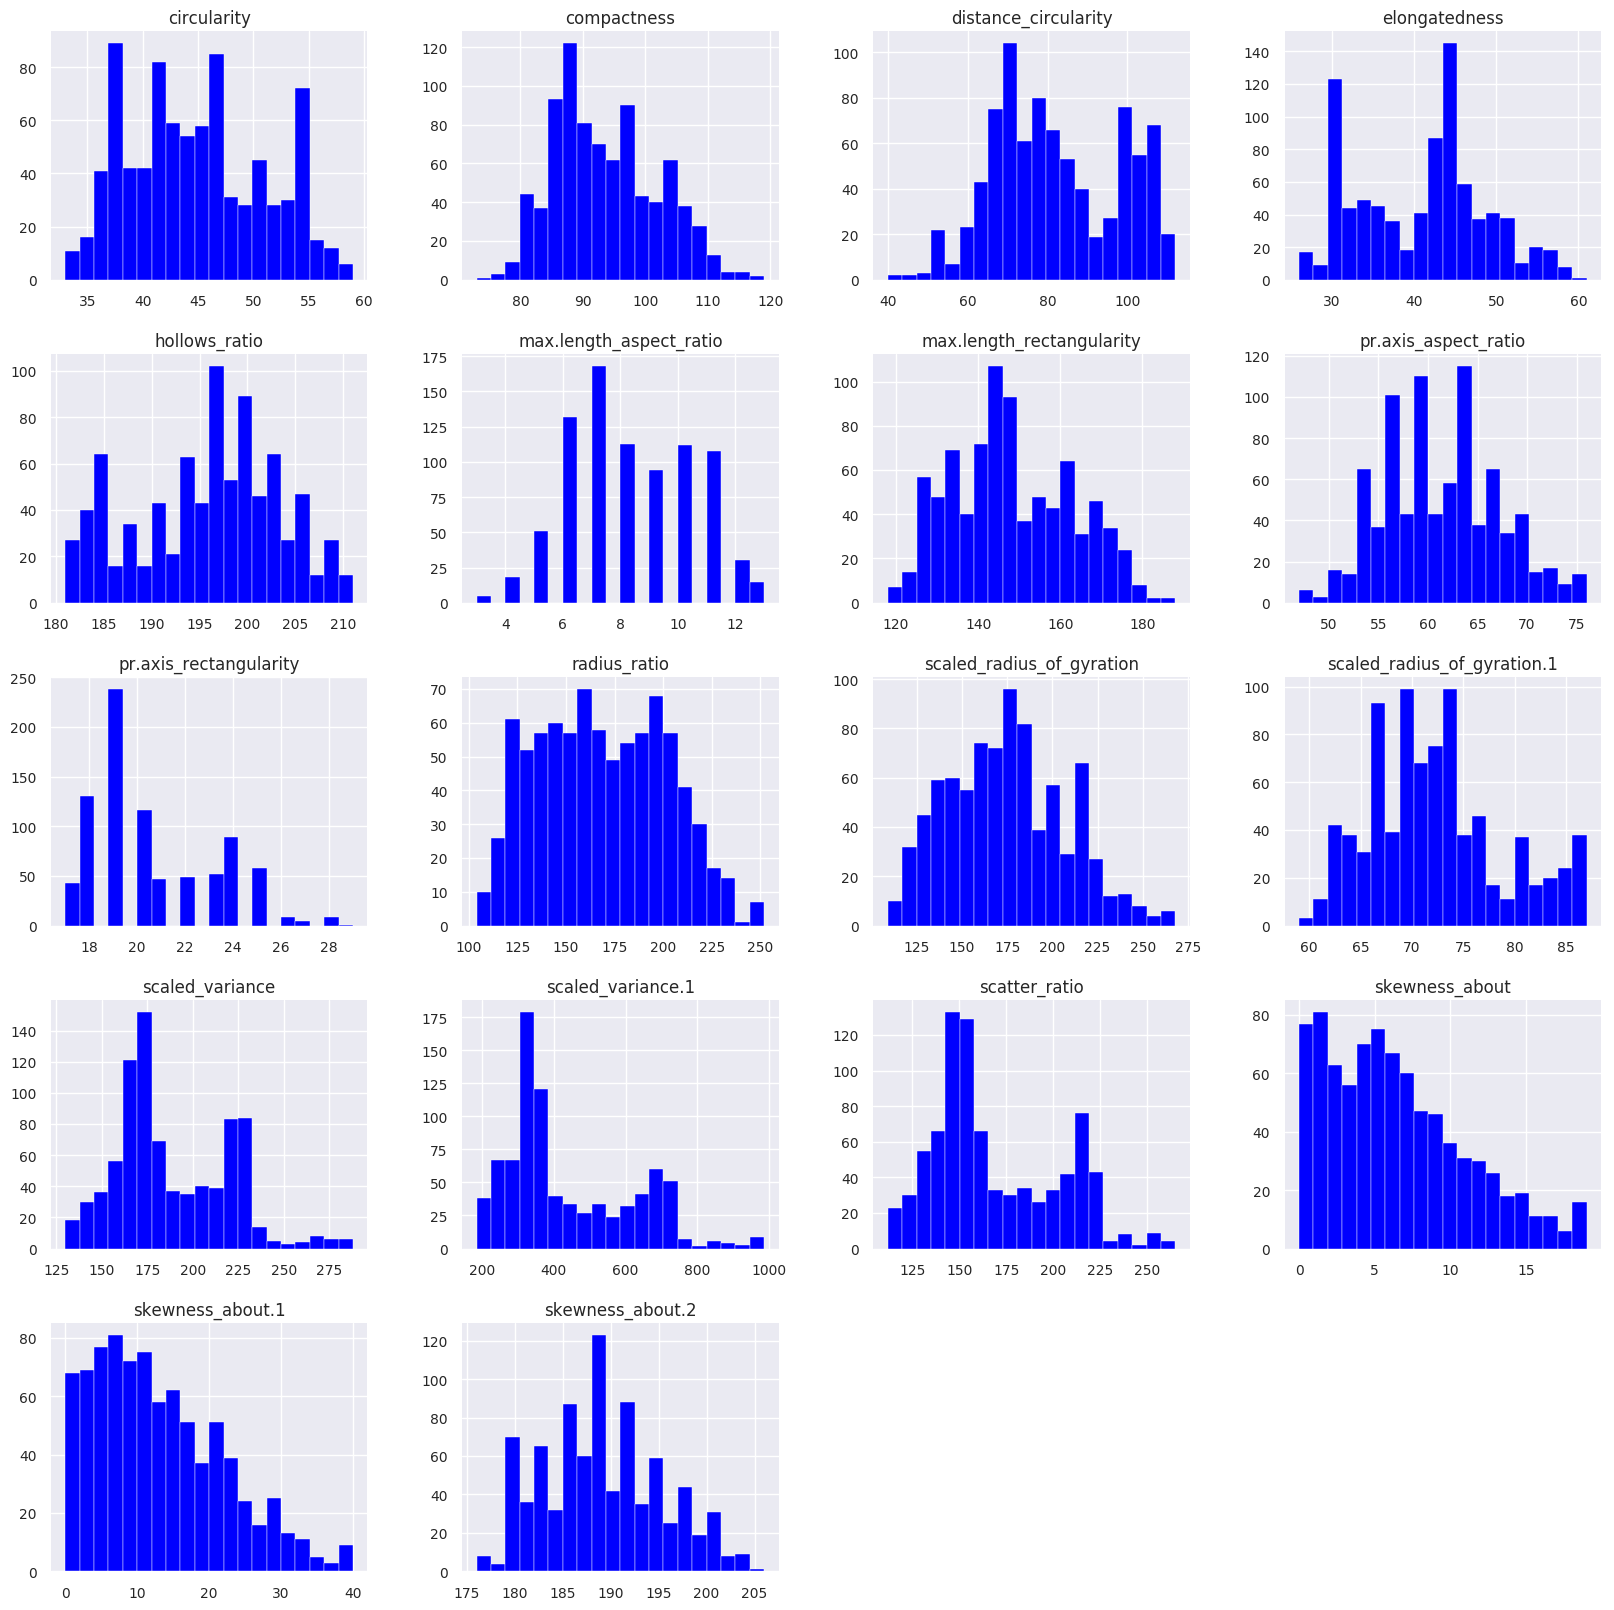

In [89]:
# Look at the individual distribution histogram
_ = vehicle.hist(figsize=(20,20), bins=20, color='blue')

### NULL Treatement
As there are 3 different vehicle types present in the dataset, we will be replacing the NaN values in each feature with the median from their respective class types.

In [57]:
# Split the dataset according to their class types
unique_vehicles = [vehicle[vehicle['class'] == veh] for veh in vehicle['class'].unique()]

# Replaces the NULLs with the median of the respective feature
for unique_veh in unique_vehicles:
    for col in unique_veh.columns[:-1]:
        median = unique_veh[col].median()
        unique_veh[col] = unique_veh[col].fillna(median)

# Join the splitted datasets back together and sort the index
vehicle = pd.concat(unique_vehicles).sort_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [58]:
# Check the dataset after NULL treatment
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [59]:
# Describe the dataset with various other summary and statistics
vehicle.describe().T

count        mean  ...     75%     max
compactness                  846.0   93.678487  ...  100.00   119.0
circularity                  846.0   44.826241  ...   49.00    59.0
distance_circularity         846.0   82.066194  ...   98.00   112.0
radius_ratio                 846.0  168.916076  ...  195.00   333.0
pr.axis_aspect_ratio         846.0   61.680851  ...   65.00   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.00    55.0
scatter_ratio                846.0  168.920804  ...  198.00   265.0
elongatedness                846.0   40.927896  ...   46.00    61.0
pr.axis_rectangularity       846.0   20.579196  ...   23.00    29.0
max.length_rectangularity    846.0  147.998818  ...  159.00   188.0
scaled_variance              846.0  188.643026  ...  217.00   320.0
scaled_variance.1            846.0  439.665485  ...  586.75  1018.0
scaled_radius_of_gyration    846.0  174.712766  ...  198.00   268.0
scaled_radius_of_gyration.1  846.0   72.443262  ...   75.00   135.0
skewness_about               846.0    6.356974  ...    9.00    22.0
skewness_about.1             846.0   12.604019  ...   19.00    41.0
skewness_about.2             846.0  188.919622  ...  193.00   206.0
hollows_ratio                846.0  195.632388  ...  201.00   211.0

[18 rows x 8 columns]

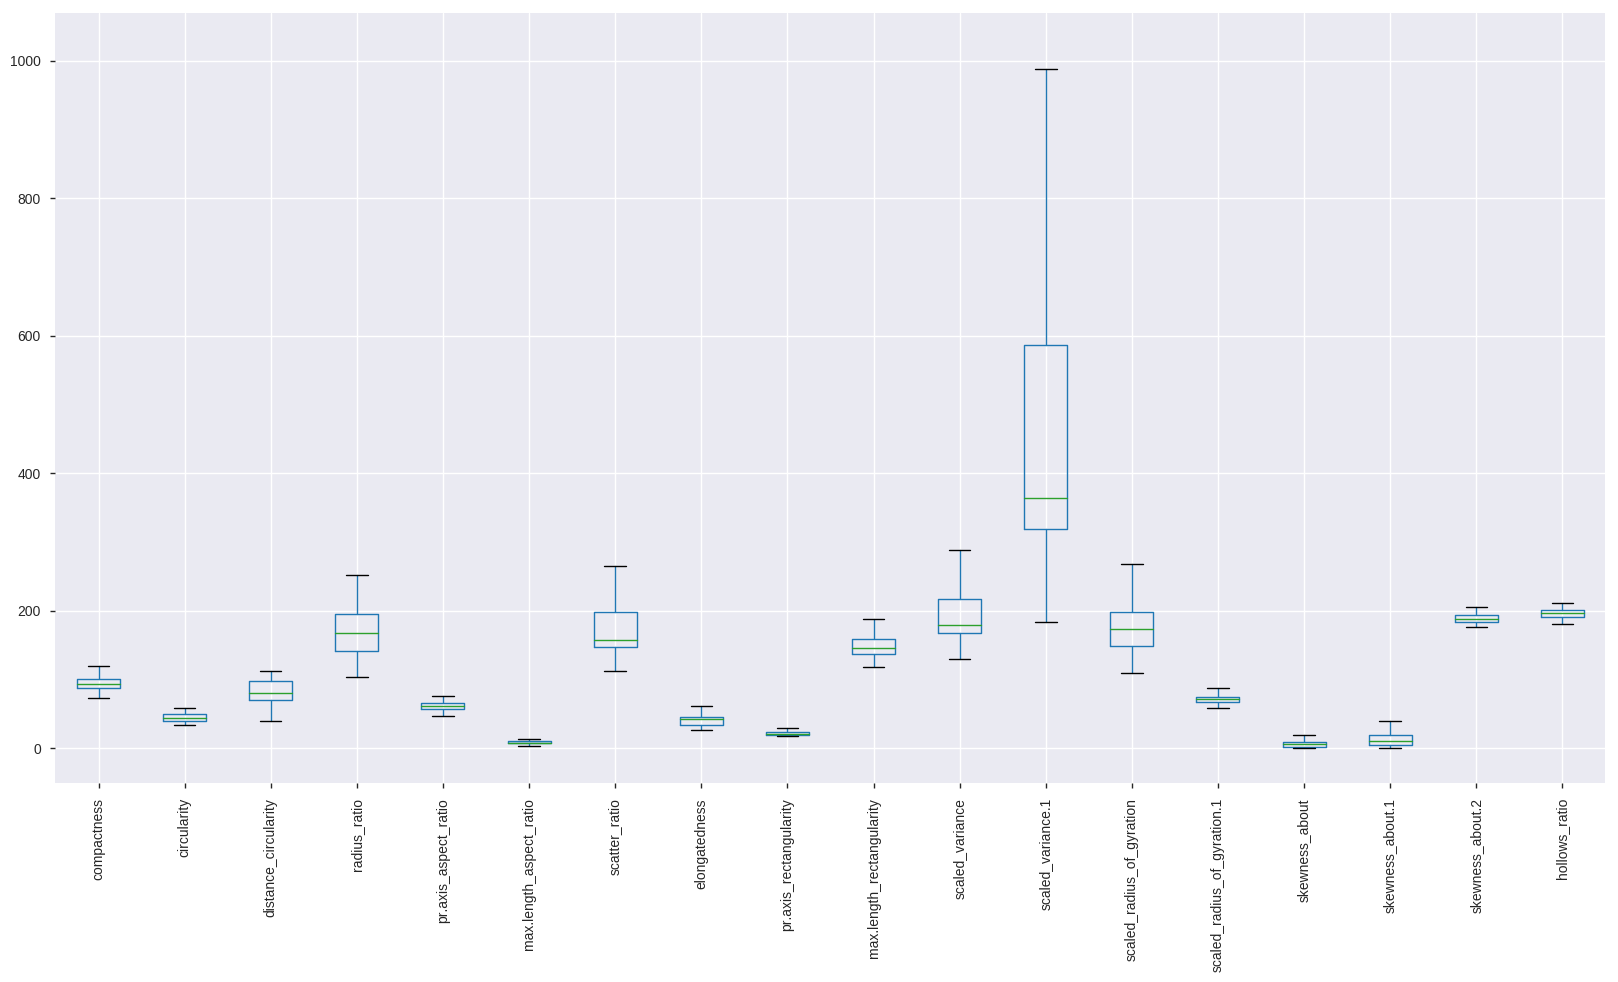

In [60]:
# Plot the central tendency of the dataset
_, bp = vehicle.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [61]:
# Count the number of outlier data points present in each feature
for idx, col in enumerate(vehicle.columns[:-1]):
    print(col, '--', len(fliers[idx]))

compactness -- 0
circularity -- 0
distance_circularity -- 0
radius_ratio -- 3
pr.axis_aspect_ratio -- 8
max.length_aspect_ratio -- 13
scatter_ratio -- 0
elongatedness -- 0
pr.axis_rectangularity -- 0
max.length_rectangularity -- 0
scaled_variance -- 1
scaled_variance.1 -- 2
scaled_radius_of_gyration -- 0
scaled_radius_of_gyration.1 -- 15
skewness_about -- 12
skewness_about.1 -- 1
skewness_about.2 -- 0
hollows_ratio -- 0


**Observations:**
- *radius_ratio* and *scaled_variances* have a wide spread of data as indicated by the large difference of min and max values of their distribution.
- Large difference between min and 1st quartile and/or 3rd quartile and max values indicates potential outliers. Hence *radius_ratio*,*pr.axis_aspect_ratio*, *max.length_aspect_ratio*, *scaled_variance*, *scaled_variance.1*, *scaled_radius_of_gyration.1*, *skewness_about*, *skewness_about.1* features contain outliers.
- min value 0 of *skewness_about*, *skewness_about.1* indicates these two features contain 0s in their distribution.

### Outlier Treatement
**Min/Max Replacement:** There are 8 features present in the dataset which contains outliers. Outliers will be replaced by their nearest whisker ends in the central tendency. Means datapoints which are $1.5*IQR$ below the $Q_1$ will be replaced by min of lower whisker and which are $1.5*IQR$ above the $Q_3$ will be replaced by max of higher whisker.

In [0]:
# Treat the outlier data points
for idx, col in enumerate(vehicle.columns[:-1]):
    q1 = vehicle[col].quantile(0.25)
    q3 = vehicle[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    vehicle.loc[(vehicle[col] < low), col] = caps[idx * 2][0]
    vehicle.loc[(vehicle[col] > high), col] = caps[idx * 2 + 1][0]

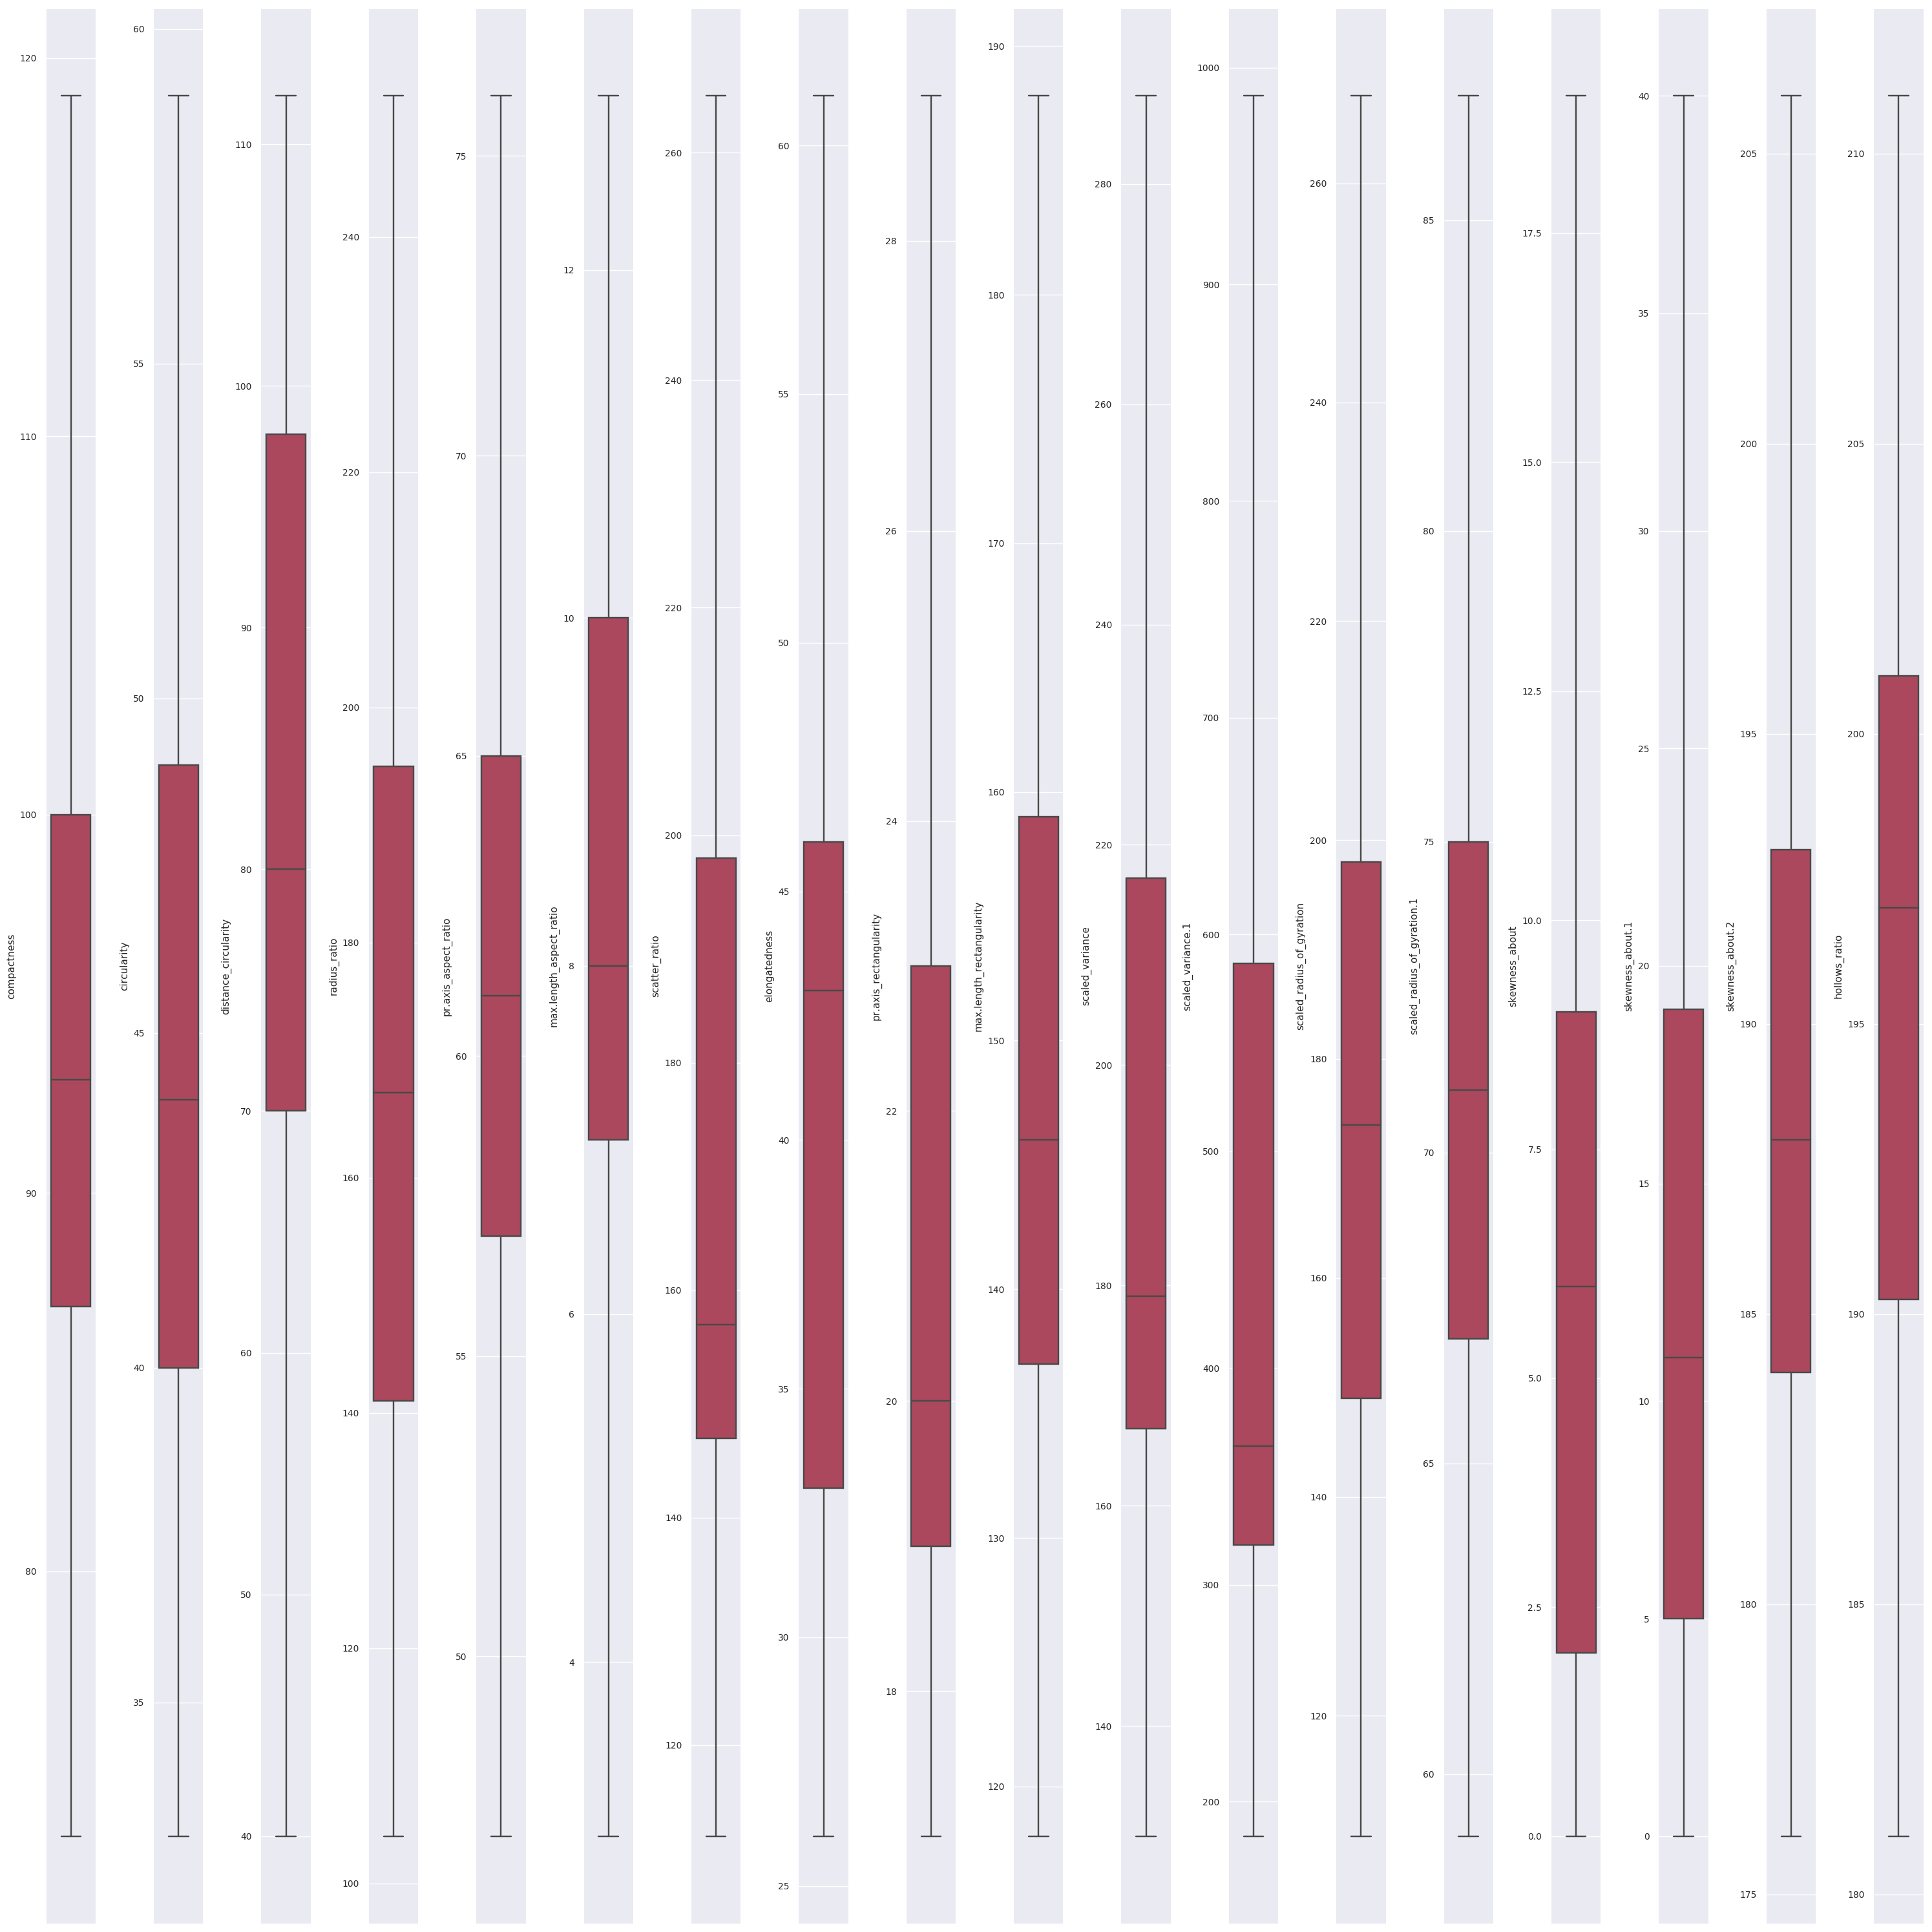

In [63]:
# Check the dataset after Outlier treatment
sns.set_style('darkgrid')
plt.figure(figsize=(30, 30))
index = 1
for col in vehicle.columns[:-1]:
    plt.subplot(1, len(vehicle.columns[:-1]), index)
    sns.boxplot(y=vehicle[col], palette='inferno', fliersize=12)
    index += 1
plt.tight_layout()

---
## Deliverable - 2
Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why
### Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative analysis which involves the study of two variables, for the purpose of determining the emperical relationship between them.
#### Pairplot
Pairplot helps picturizing the pair wise relationship between two variables. It creates a square matrix of no of continous attributes of the dataset. The diagonal plots represents the histogram and/or the kde plot of a particular attributes where as the upper or lower trangular plots represents the co-linearity of two attributes.

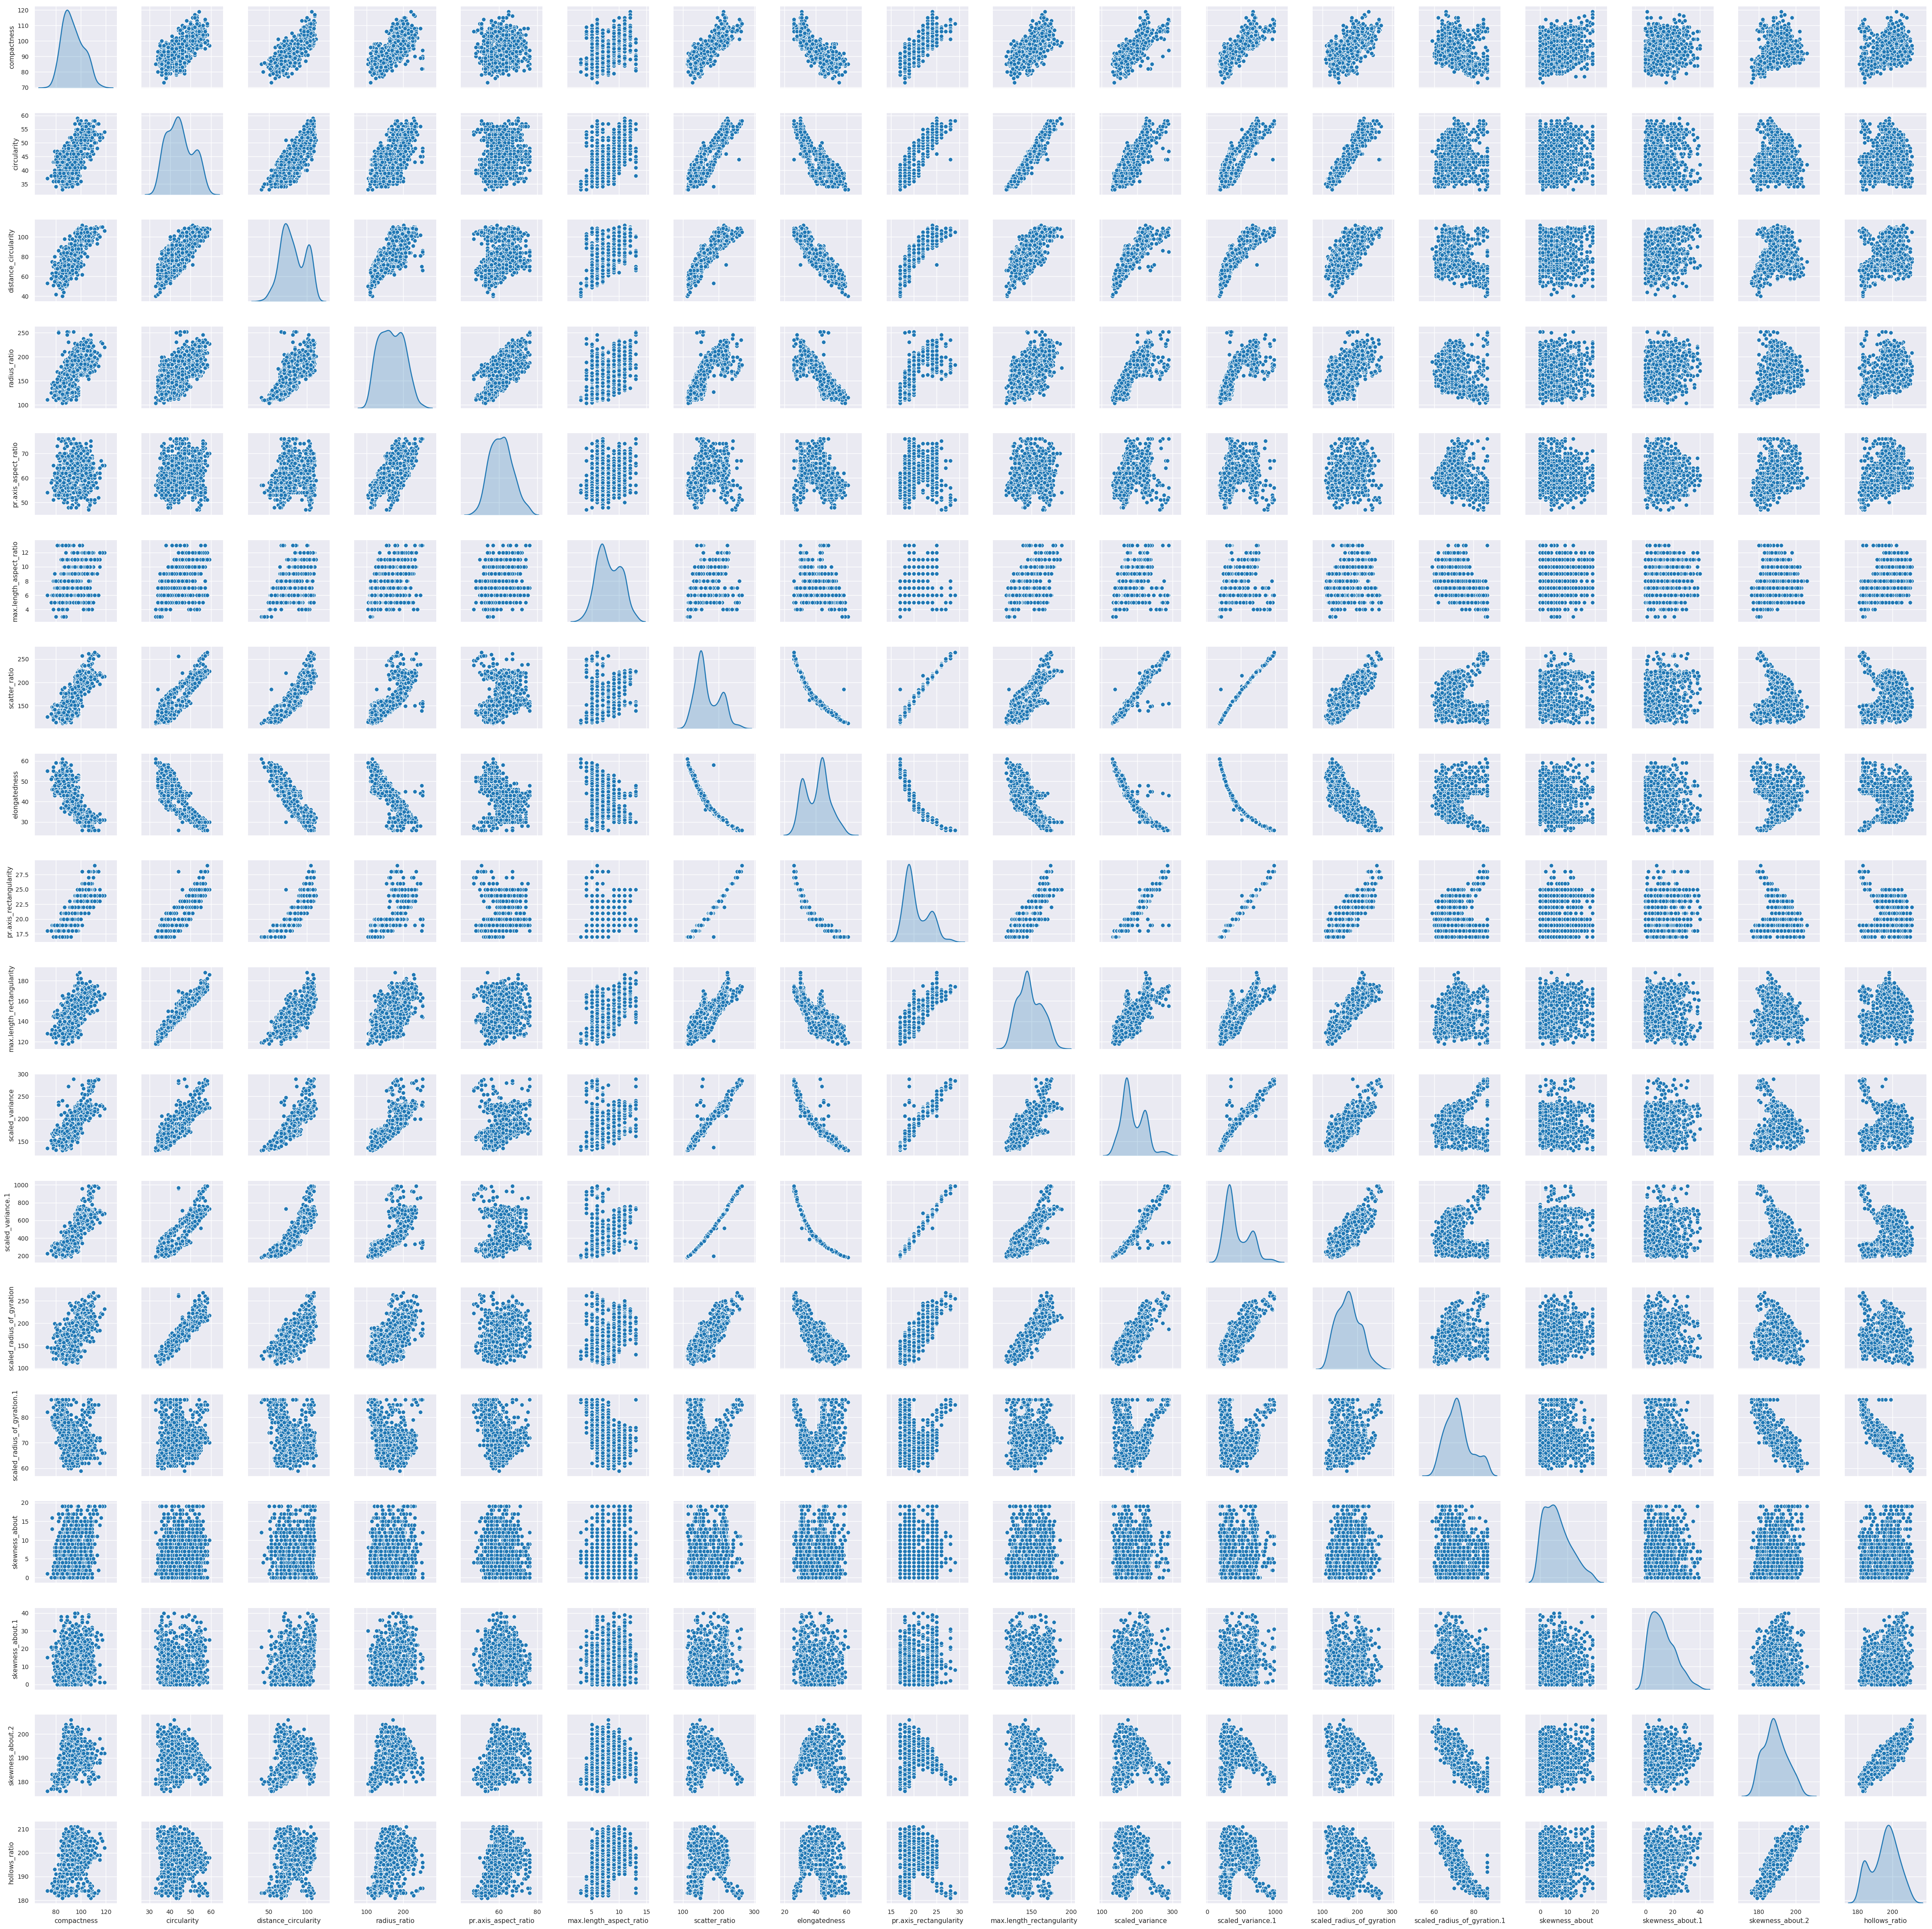

In [64]:
sns.pairplot(vehicle, diag_kind='kde')

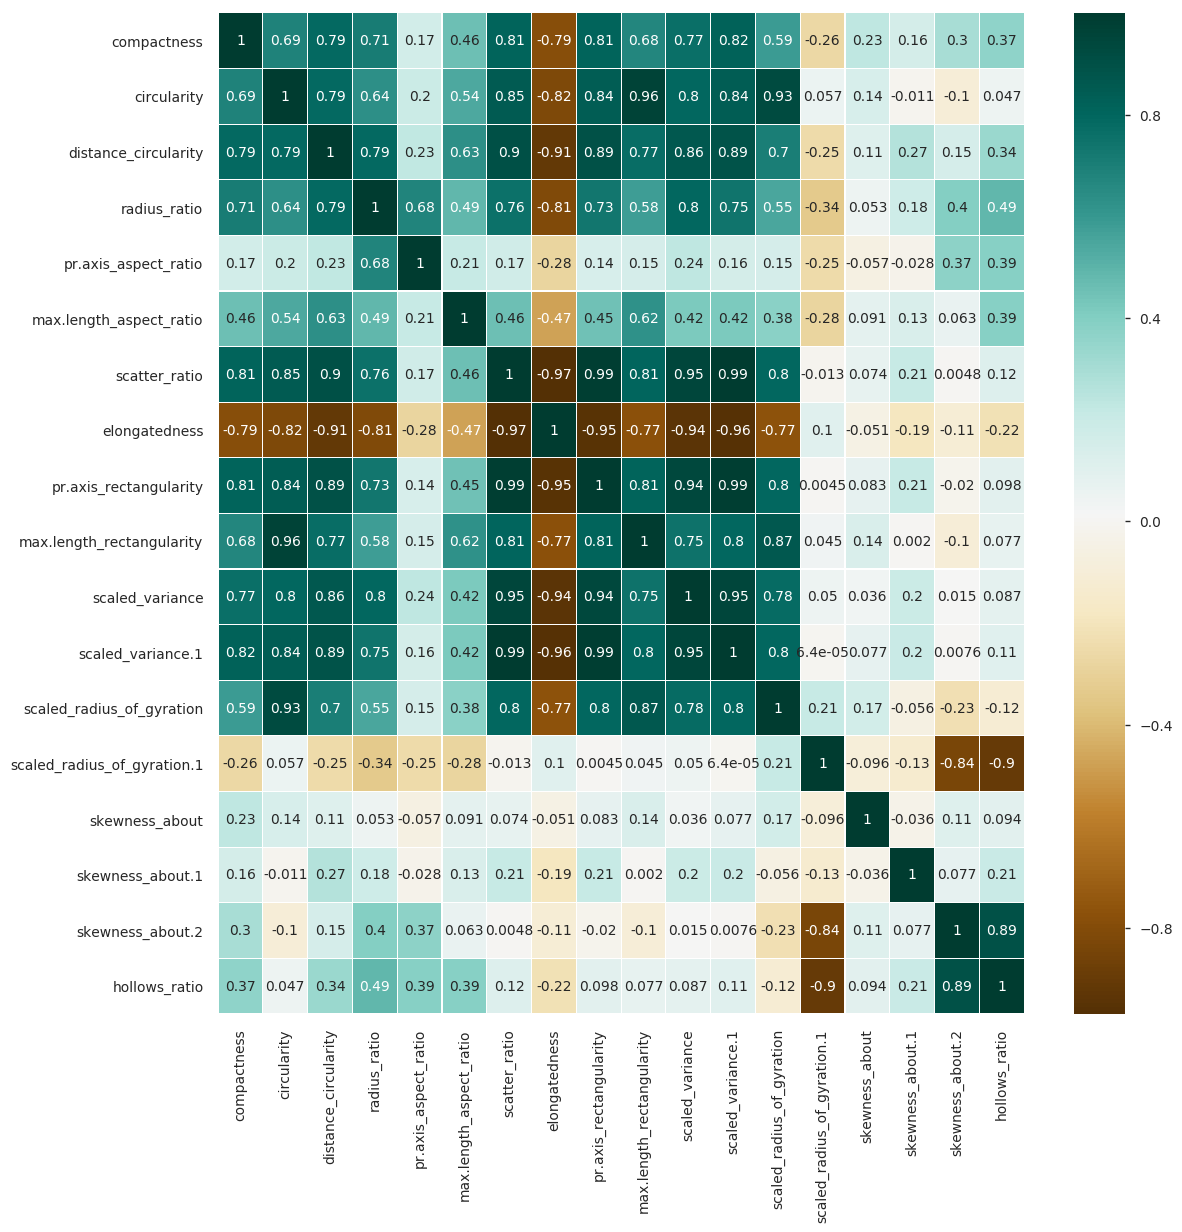

In [65]:
# Visualize the correlation among independent features
plt.figure(figsize=(13,13))
sns.heatmap(vehicle.corr(), annot=True, linewidths=0.1, cmap='BrBG')

**Observations:**
- Almost all the scatter plots are rugby shaped, very few scatter plots are of cloud in structure.
- Looking at the heatmap also, the maximum part of it is dark shaded, which means the correlation co-efficient is higher for them.
- This means most of the features are highly co-related with each other either positively or negatively. This explains there is a higher degree of multi-colinearity present in the dataset.
- Only the plots for ***skewness_about*** and ***skewness_about.1*** is showing cloud structure across all other features. The heat map for these two features also have all light shades across.
- Hence these 2 features have less colinearity with other features. Let's visualize it through regression plots.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


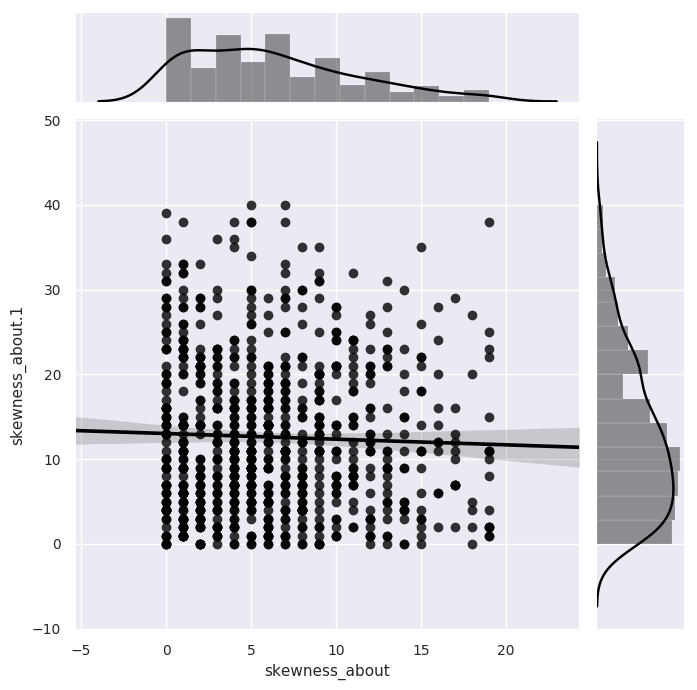

In [66]:
sns.jointplot('skewness_about', 'skewness_about.1', vehicle, kind='reg', size=7, color='k')

**Observations:**
- The parallel regression line shows these 2 features are not co-related with each other also. So, ideally we should exclude them from PCA analysis.

But let's perform **`Feature Importance`** analysis to see which features are more important in deciding the target class.

In [0]:
# Divide the dataset into Input features and Target variables
X = vehicle.drop('class', axis=1)
y = vehicle['class']

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


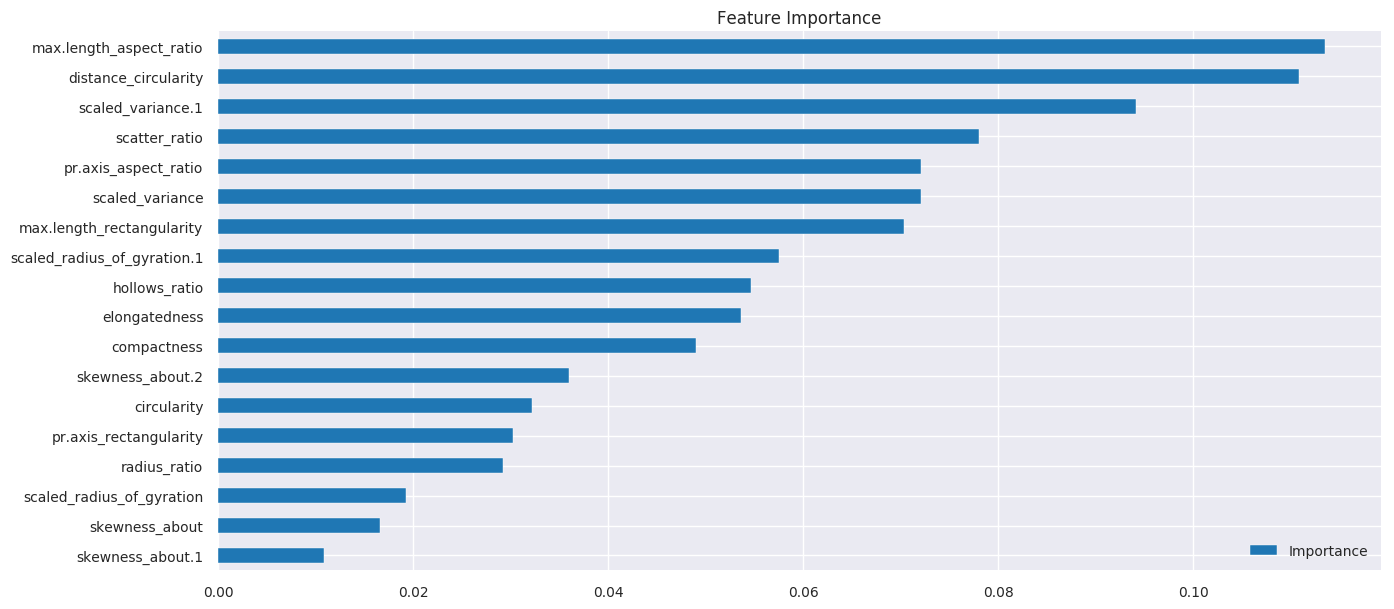

In [68]:
# Feature Importance plot using Random Forest Classifier
rf = RandomForestClassifier().fit(X, y)
pd.DataFrame(rf.feature_importances_, index = vehicle.columns[:-1], 
             columns=['Importance']).sort_values('Importance').plot(kind='barh', figsize=(15,7), title='Feature Importance')

**Observation:**
- From the plot above it is shown that *skewness_about* and *skewness_about.1* are more important than few other features.
- So let's include all the features of the dataset and perform PCA analysis

### Understanding the target variable

In [69]:
# Find count of unique target variable
len(y.unique())
# OR
y.nunique()

3

In [70]:
# What are the different values for the dependant variable
y.unique()

array(['van', 'car', 'bus'], dtype=object)

In [71]:
# Find out the value counts in each outcome category
# vehicle.groupby('class').size()
y.value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

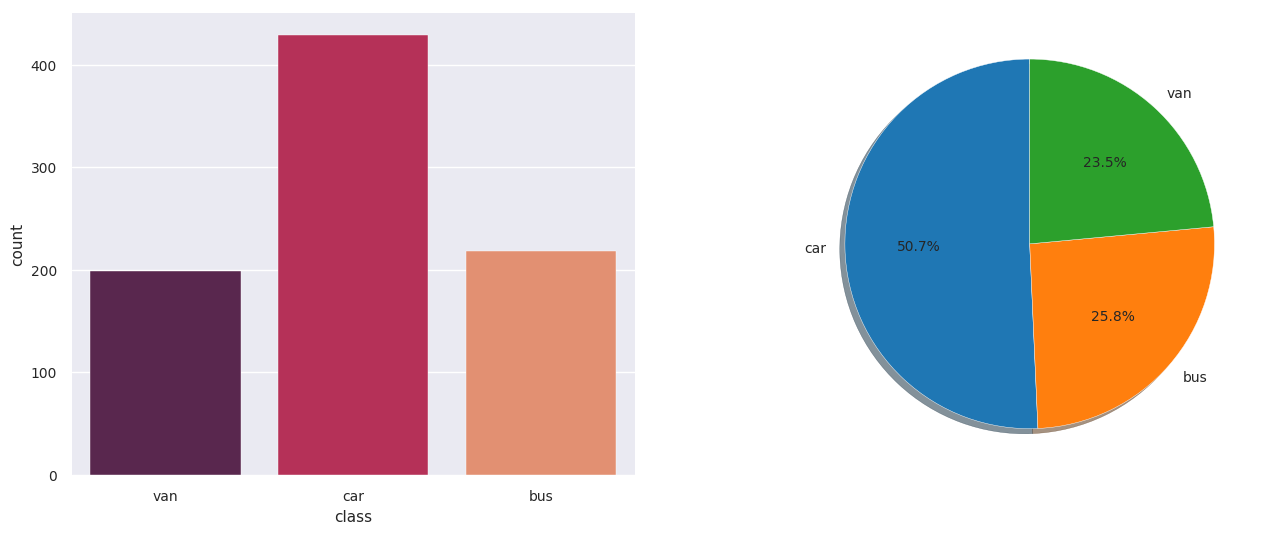

In [72]:
# Check the frequency distribution of each target class
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(y, ax=axes[0], palette='rocket')
_ = axes[1].pie(y.value_counts(), autopct='%1.1f%%', shadow=True, startangle=90, labels=y.value_counts().index)

**Observation**
- The ratio of car to bus to van in the dataset is close to **2:1:1**. Of course the car types vehicles includes 2 different types of cars i.e. Saab 9000 and an Opel Manta 400. Hence we can consider this dataset to be almost balanced dataset in terms target classes.

In [73]:
# Compare class wise mean
pd.pivot_table(vehicle, index='class', aggfunc=['mean']).T

class                                    bus         car         van
mean circularity                   44.963303   46.034965   42.070352
     compactness                   91.591743   96.184149   90.562814
     distance_circularity          76.701835   88.878788   73.256281
     elongatedness                 40.114679   38.088578   47.939698
     hollows_ratio                191.325688  197.582751  196.145729
     max.length_aspect_ratio        6.545872    8.825175    8.592965
     max.length_rectangularity    146.701835  149.967366  145.175879
     pr.axis_aspect_ratio          63.064220   60.993007   60.030151
     pr.axis_rectangularity        20.573394   21.512821   18.572864
     radius_ratio                 165.724771  180.629371  146.130653
     scaled_radius_of_gyration    180.986239  179.613054  157.276382
     scaled_radius_of_gyration.1   76.743119   69.925408   72.206030
     scaled_variance              192.889908  197.932401  163.804020
     scaled_variance.1            448.701835  500.596737  298.201005
     scatter_ratio                170.022936  181.062937  141.537688
     skewness_about                 4.798165    7.062937    6.417085
     skewness_about.1              10.211009   15.165501    9.698492
     skewness_about.2             187.811927  189.473193  188.939698

**Observations:**
- There is not much of variation of any features in all the three vehicle types.

---
## Deliverable - 3
Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

#### Curse of Dimensionality
Curse of dimensionality is the phenomenon where the feature space becomes increasingly sparse for an increasing number of
dimensions of a fixed-size training dataset. Analyzing and organizing the data in a high-dimensional spaces (often with hundreds or thousands of dimensions) are always prone to various adverse outcomes. Most of the machine learning algorithms are very susceptible to overfitting due to the curse of dimensionality.

To overcome such situations, we do feature engineering where algorithms run their logic to reduce the higher no. of dimensions. PCA is one such feature extraction technique.
### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) uses "orthogonal linear transformation" to introduces a lower-dimensional representation of the dataset. It finds a sequence of linear combination of the variables called the principal components that explain the maximum variance and summarize the most information in the data and are mutually uncorrelated with each other.

PCA allows us to quantify the trade-offs between the number of features we utilize and the total variance explained by the data. PCA allows us to determine which features capture similiar information and discard them to create a more parsimonious model.

In order to perform PCA we need to do the following:
1. Standardize the data.
2. Use the standardized data to create a covariance matrix.
3. Use the resulting matrix to calculate eigenvectors (principal components) and their corresponding eigenvalues.
4. Sort the components in decending order by its eigenvalue.
5. Choose n components which explain the most variance within the data (larger eigenvalue means the feature explains more variance).
6. Create a new matrix using the n components.

#### Step 1: Standardize the data
StandardScaler() will normalize the features so that each column/feature/variable will have mean = 0 and standard deviation = 1.

In [74]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe().T

count          mean  ...       75%       max
compactness                  846.0  5.572112e-16  ...  0.768143  3.076880
circularity                  846.0 -3.721741e-16  ...  0.680795  2.311927
distance_circularity         846.0  3.905465e-16  ...  1.011995  1.901169
radius_ratio                 846.0 -1.359564e-16  ...  0.809076  2.560840
pr.axis_aspect_ratio         846.0  3.280801e-16  ...  0.638785  2.537998
max.length_aspect_ratio      846.0  9.369967e-17  ...  0.845236  2.240948
scatter_ratio                846.0 -1.304446e-16  ...  0.876403  2.895681
elongatedness                846.0 -4.173179e-16  ...  0.649538  2.570453
pr.axis_rectangularity       846.0 -4.776846e-17  ...  0.934909  3.252095
max.length_rectangularity    846.0  7.968409e-16  ...  0.758332  2.757358
scaled_variance              846.0  0.000000e+00  ...  0.909507  3.183690
scaled_variance.1            846.0 -1.858246e-16  ...  0.834895  3.106064
scaled_radius_of_gyration    846.0  6.377877e-17  ...  0.715935  2.867990
scaled_radius_of_gyration.1  846.0  1.414353e-16  ...  0.429891  2.284651
skewness_about               846.0  2.057718e-16  ...  0.554820  2.630793
skewness_about.1             846.0 -4.199425e-17  ...  0.717014  3.070761
skewness_about.2             846.0  1.375574e-15  ...  0.663635  2.777962
hollows_ratio                846.0  1.544470e-15  ...  0.721997  2.067095

[18 rows x 8 columns]

#### Step 2: Create a Covariance Matrix

In [75]:
covar_matrix = PCA(n_components=X_scaled.shape[1])
covar_matrix

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Step 3: Calculate Eigenvalues

In [76]:
covar_matrix.fit(X_scaled)

# calculate variance ratios
var = covar_matrix.explained_variance_ratio_;var

array([5.39141965e-01, 1.83802405e-01, 6.63913246e-02, 6.47470936e-02,
       4.85508291e-02, 4.05950004e-02, 1.86116604e-02, 1.22889234e-02,
       7.21979678e-03, 5.21573613e-03, 3.47395973e-03, 3.10245363e-03,
       2.27000714e-03, 1.66632188e-03, 1.25730188e-03, 1.01160535e-03,
       4.58115343e-04, 1.95500203e-04])

In [77]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([53.9, 72.3, 78.9, 85.4, 90.3, 94.4, 96.3, 97.5, 98.2, 98.7, 99. ,
       99.3, 99.5, 99.7, 99.8, 99.9, 99.9, 99.9])

**Observation:**
- In the above array we see that the **first feature explains roughly 54%** of the variance within our data set while the first two explain 72.3% and so on.
- If we employ 7 features we capture 96.3% (threshold = 95%) of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

#### Step 4, 5: Sort & Select
Generic Method to draw a **Scree Plot**

In [0]:
def generate_scree_plot(covar_matrix, threshold):
    var = covar_matrix.explained_variance_
    eigen_vals = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    f.suptitle('PCA Scree plot')

    ax1.plot(np.arange(1, len(var)+1), var, '-go')
    ax1.set_xticks(np.arange(1, len(var)+1))
    ax1.set_title('Explained Variance')
    ax1.set_xlabel('# of Components')
    ax1.set_ylabel('Eigen Values')

    ax2.plot(np.arange(1, len(eigen_vals)+1), eigen_vals, ':k', marker='o', markerfacecolor='red', markersize=8)
    ax2.set_xticks(np.arange(1, len(eigen_vals)+1))
    ax2.axhline(y=threshold, color='r', linestyle=':', label='Threshold(95%)')
    ax2.legend()
    ax2.plot(np.arange(sum(eigen_vals <= threshold) + 1, len(eigen_vals) + 1), 
             [val for val in eigen_vals if val > threshold], '-bo')
    ax2.set_ylim(bottom=threshold-10, top=100)
    ax2.set_xlim(right=11)
    ax2.set_title('Cumulative sum Explained Variance Ratio')
    ax2.set_xlabel('# of Components')
    ax2.set_ylabel('% Variance Explained')

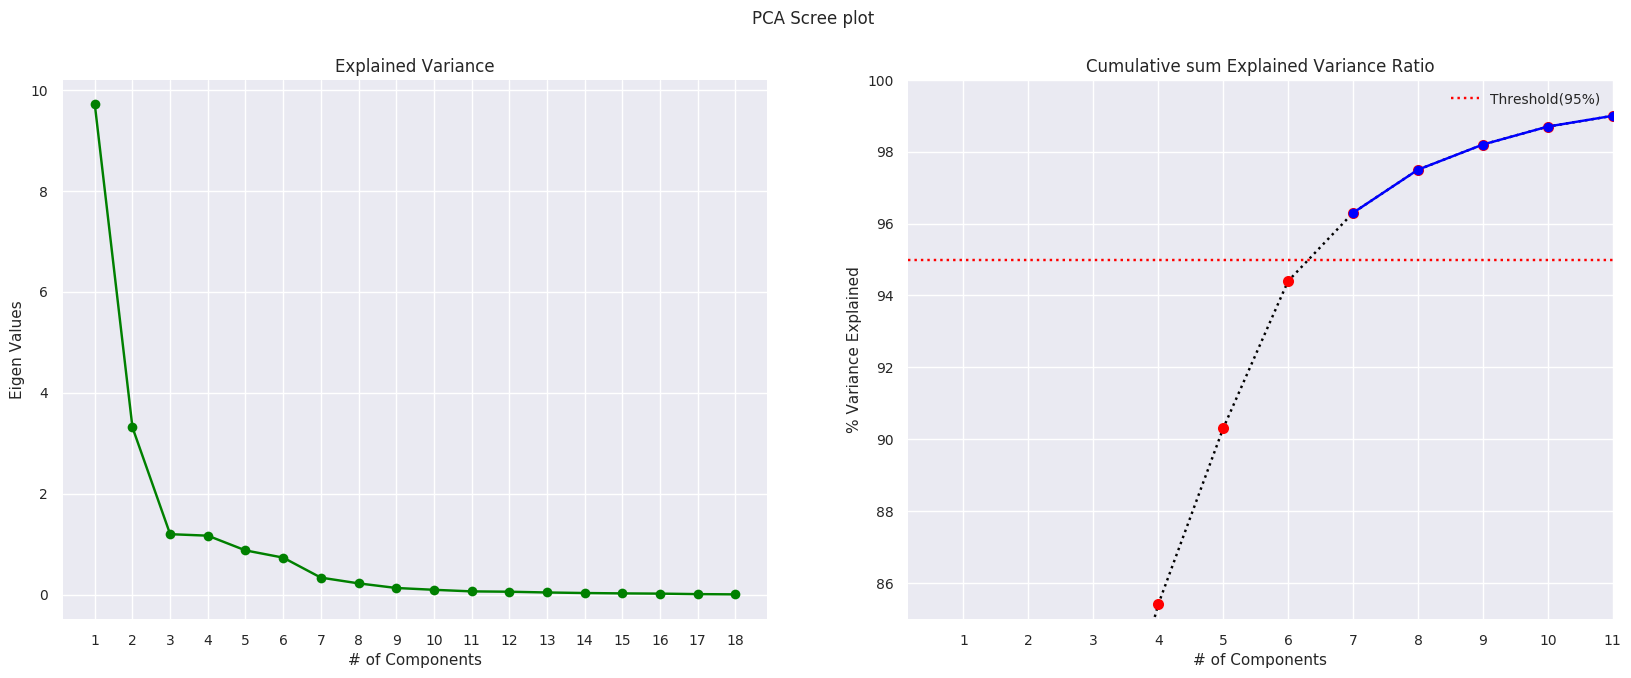

In [79]:
generate_scree_plot(covar_matrix, threshold=95)

#### Cumulative Eigen value plot

(0, 12)

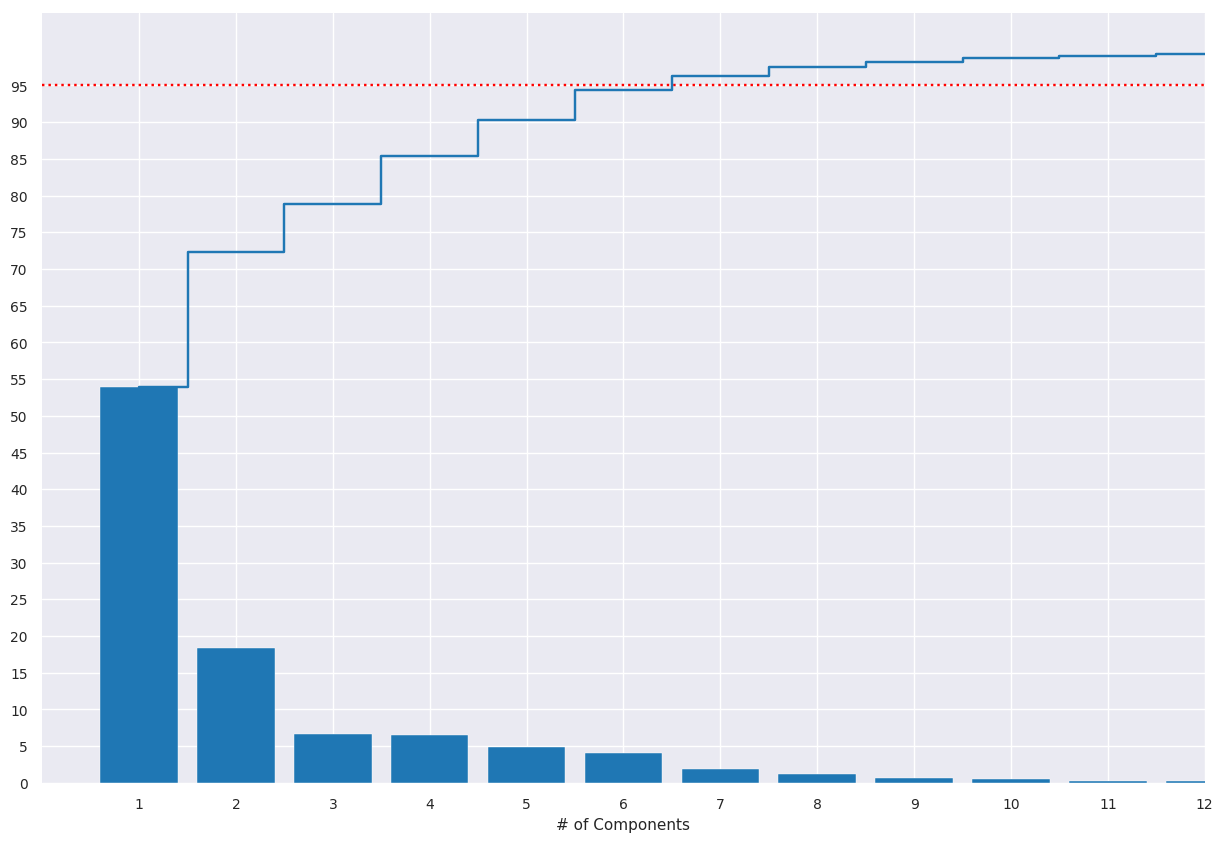

In [80]:
plt.figure(figsize=(15,10))
plt.axhline(y=95, color='r', linestyle=':')
plt.bar(np.arange(1, len(eigen_vals) + 1), eigen_vals)
plt.plot(np.arange(1, len(np.cumsum(eigen_vals))+1), np.cumsum(eigen_vals), drawstyle='steps-mid')
plt.yticks(np.arange(0,100,5))
_, _ = plt.xticks(np.arange(1,18,1)), plt.xlabel('# of Components')
plt.xlim(0, 12)

**Observations:**
- Scree plot and Cumulative Eigen value plot shows that, post PCA, employing 7 principal components we are able to explain more than 95% of the variance in the dataset.
- Hence we will be reducing our feature space to **7 dimensions** without loosing much of information.

#### Step 6: Create the projected features

In [81]:
# Create a new matrix using the n components
X_projected = PCA(n_components=7).fit_transform(X_scaled)
X_projected.shape

(846, 7)

---
## Deliverable - 4
Use the follwoing algorithms and use grid search to find out the best hyper parameters and do cross validation to find the accuracy.
- Support Vector Machine
- Gaussian Naive Bayes
- Random Forest

### Generic Section
Section with generic method to build and test the model

In [0]:
# Let's create a generic method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test):
    # train the model
    clf = estimator.fit(X_train, y_train)
    # predict from the claffier
    y_pred = clf.predict(X_test)
    print('*'*100)
    print('Estimator:', clf)
    print('-'*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train, clf.predict(X_train)) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('-'*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('-'*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print('*'*100)

Divide both the original and PCA projected datasets into **80:20** ratio for train and test respectively. We will evaluate the model performance using both of the datasets to see the difference

In [83]:
# Divide the original dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 18), (170, 18), (676,), (170,))

In [84]:
# Divide the projected dataset into train and test split
X_projected_train, X_projected_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=1)
X_projected_train.shape, X_projected_test.shape, y_train.shape, y_test.shape

((676, 7), (170, 7), (676,), (170,))

### Model performances on original dataset

In [85]:
# Run Classification for Support Vector Classifier
models = [SVC(), GaussianNB(), RandomForestClassifier()]
_ = [run_classification(model, X_train, X_test, y_train, y_test) for model in models]

****************************************************************************************************
Estimator: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 100.00%
Testing accuracy: 53.53%
--------------------------------------------------------------------------------
Confusion matrix:
 [[ 0 37  0]
 [ 0 90  0]
 [ 0 42  1]]
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

         bus       0.00      0.00      0.00        37
         car       0.53      1.00      0.69        90
         van       1.00      0.02      0.05        43

    accuracy                           0.54       170

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Observations:**
- The huge difference of the train and test scores of SVC and RandomForest clearly indicates that they are highly overfitted.
- Higher dimensionality and multi-colinearity is responsible for these models to overfit.

### Model performances after PCA

In [86]:
# Run Classification for Support Vector Classifier
models = [SVC(), GaussianNB(), RandomForestClassifier()]
_ = [run_classification(model, X_projected_train, X_projected_test, y_train, y_test) for model in models]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


****************************************************************************************************
Estimator: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 97.04%
Testing accuracy: 94.71%
--------------------------------------------------------------------------------
Confusion matrix:
 [[35  2  0]
 [ 1 84  5]
 [ 0  1 42]]
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

         bus       0.97      0.95      0.96        37
         car       0.97      0.93      0.95        90
         van       0.89      0.98      0.93        43

    accuracy                           0.95       170


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Observations:**
- Performance of the models increased prominently due to reduced no of dimensions.
- SVC is performing very well among these models, hence let's take model for hyperparameter tuning exercise.

### Hyperparameter Tuning
Let's perform the grid search using scikit-learn’s GridSearchCV which stands for grid search cross validation. By default, the GridSearchCV’s cross validation uses 3-fold KFold or `StratifiedKFold` depending on the situation.

In [87]:
# Run GridSearch to tune the hyper-parameter
st = time()
k_fold_cv = 10 # Stratified 10-fold cross validation
grid_params = [
    { 'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf'] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2,3,4,5,6] }
]
grid = GridSearchCV(SVC(), param_grid=grid_params, cv=k_fold_cv, n_jobs=1, iid=False)
grid.fit(X_projected, y)
print('Best hyper parameter:', grid.best_params_)
print('Time taken %.2fs to tune the best hyper-parameter for Support Vector classifier' % (time()-st))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Best hyper parameter: {'C': 1, 'kernel': 'rbf'}
Time taken 139.20s to tune the best hyper-parameter for Support Vector classifier


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
# Use the tuned estimator from GridSearch to run the classification
run_classification(grid.best_estimator_, X_projected_train, X_projected_test, y_train, y_test)

****************************************************************************************************
Estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 97.04%
Testing accuracy: 94.71%
--------------------------------------------------------------------------------
Confusion matrix:
 [[35  2  0]
 [ 1 84  5]
 [ 0  1 42]]
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

         bus       0.97      0.95      0.96        37
         car       0.97      0.93      0.95        90
         van       0.89      0.98      0.93        43

    accuracy                           0.95       170
  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Conclusion
**Multicolinearity** and **Curse of Dimensionality** are the 2 major phenomenon which adversly impact any machine learning model. With higher degree of multicolinearity, model tend to leave behind the major information that is contained in the mathematical space of the input features. And with Curse of Dimensionality because of the feature space becoming increasingly sparse for an increasing number of dimensions of a fixed-size training dataset, model tend to overfit.

Principal Component Analyis helps adressing these problem and improves the model performance to a great extent.